In [2]:
import scipy.stats as stats
import numpy as np
import statsmodels.stats.multicomp as multi
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

data2013_p1


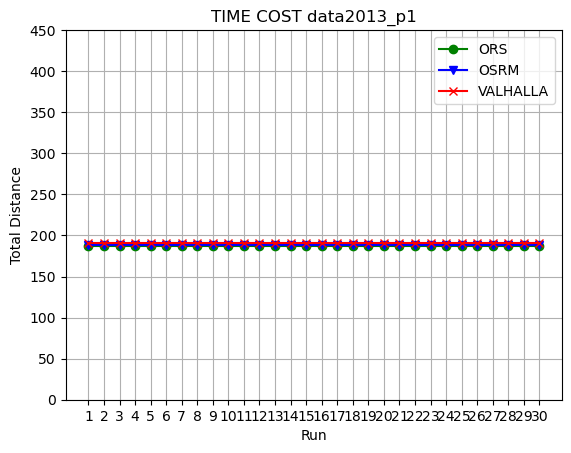

data2013_p2


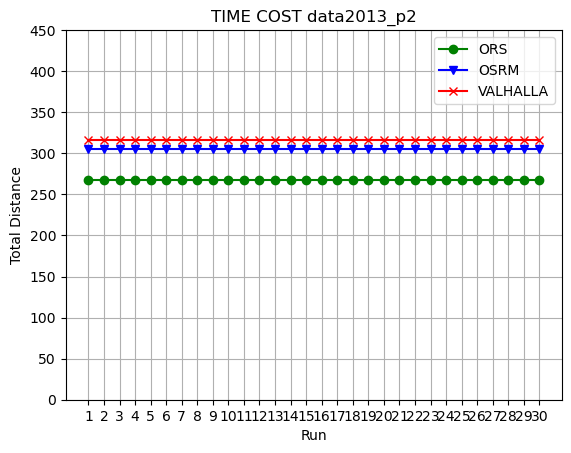

data2014_p1


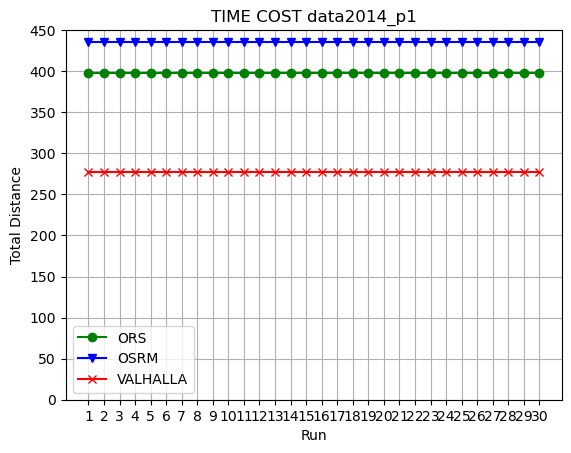

data2014_p2


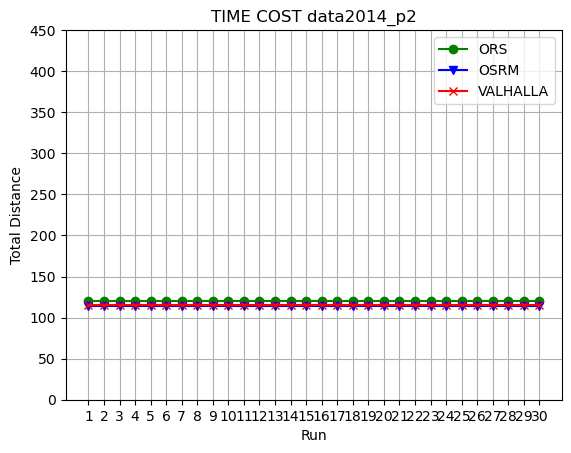

data2015_p1


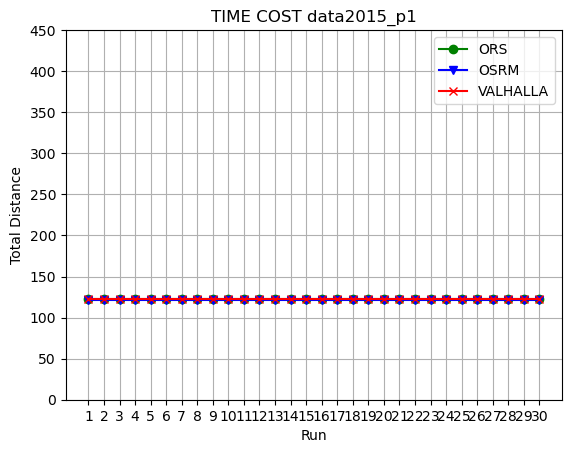

data2015_p2


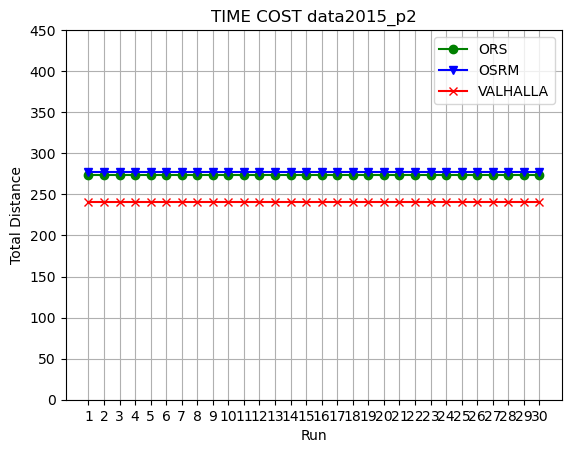

data2016_p1


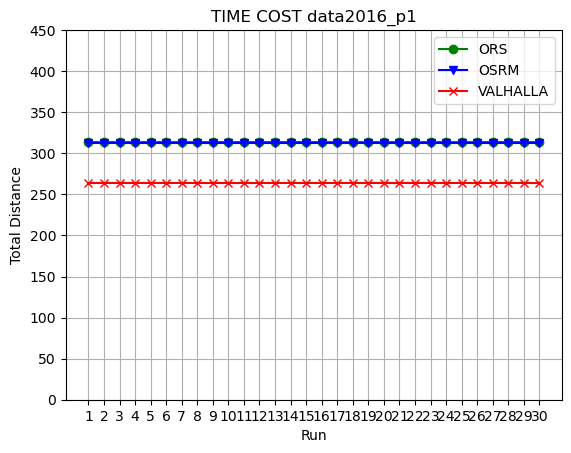

data2016_p2


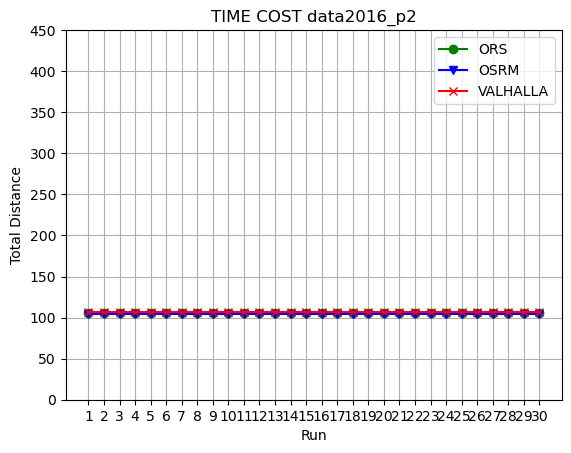

data2017_p1


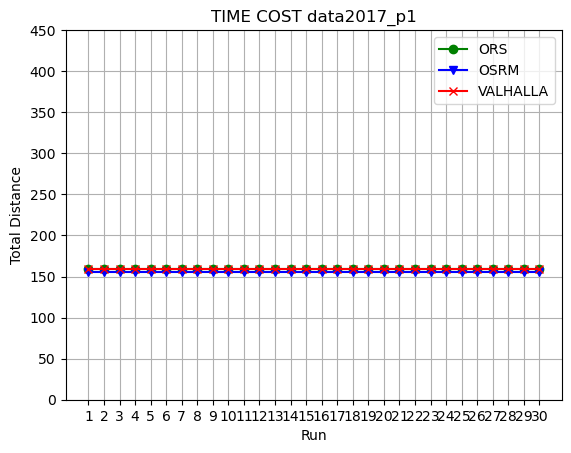

data2017_p2


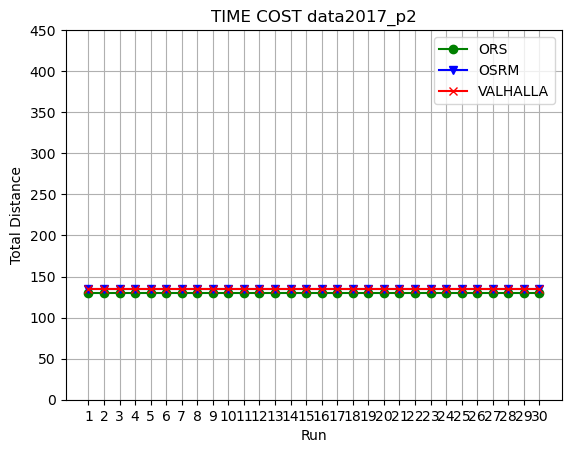

data2018_p1


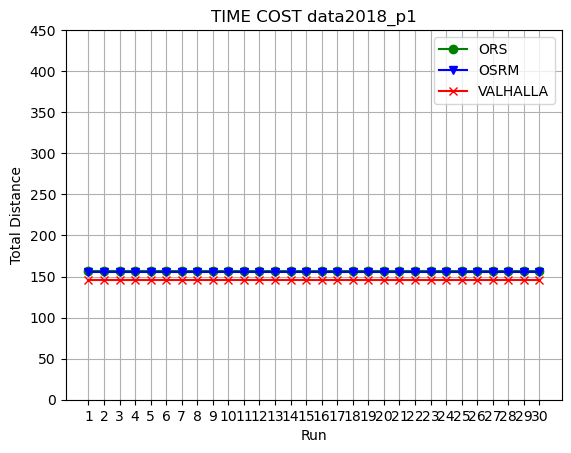

data2018_p2


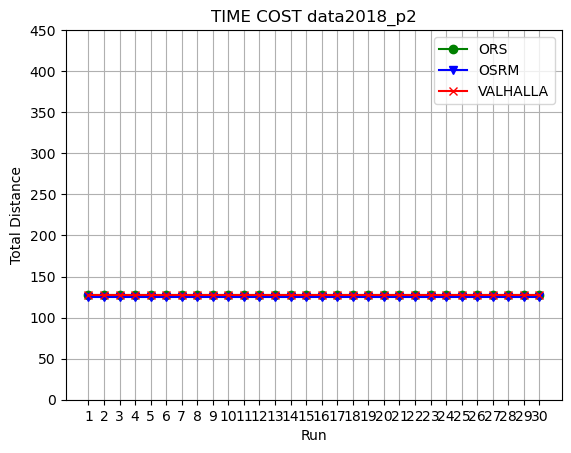

data2019_p1


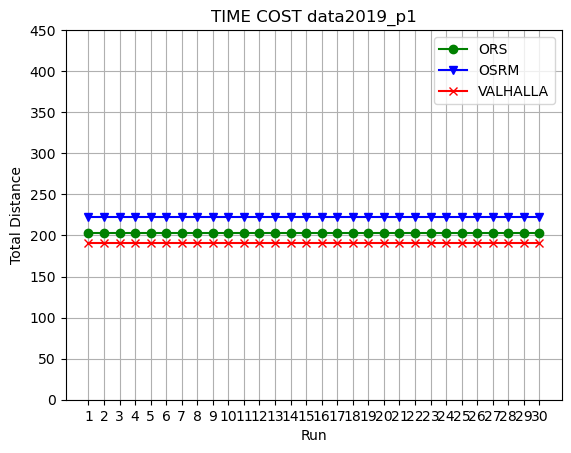

data2019_p2


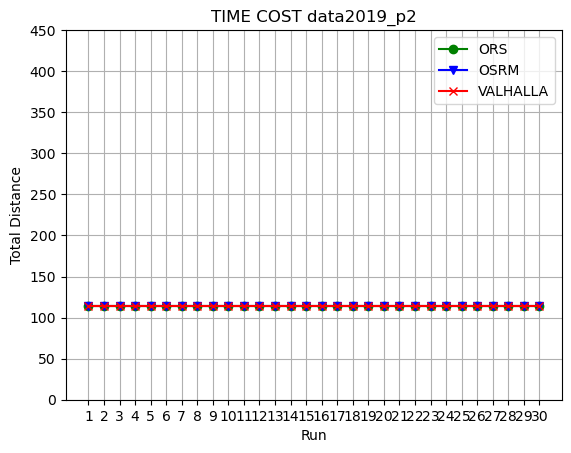

data2020_p1


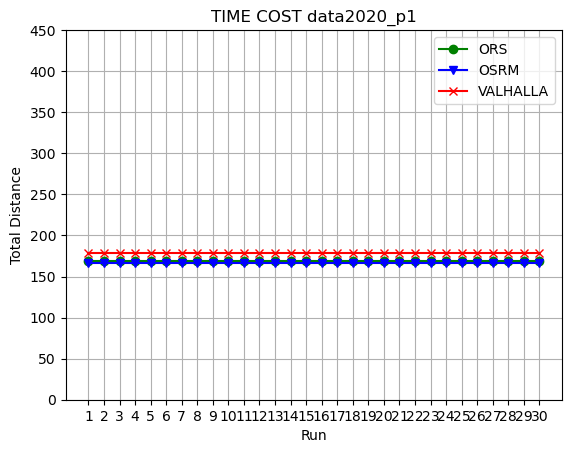

data2020_p2


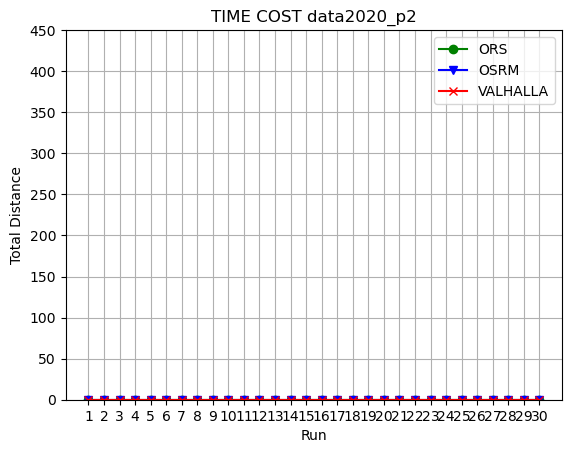

data2021_p1


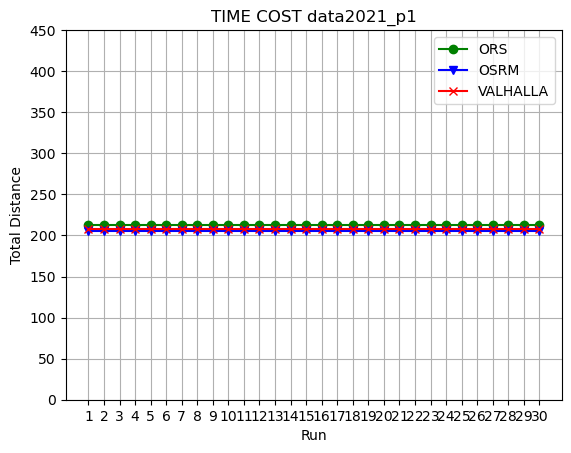

data2021_p2


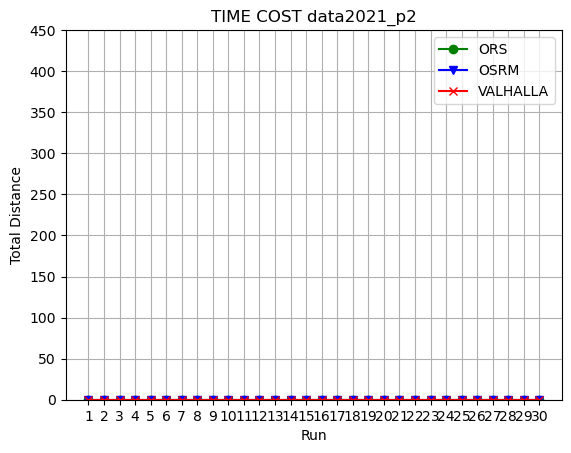

data2022_p1


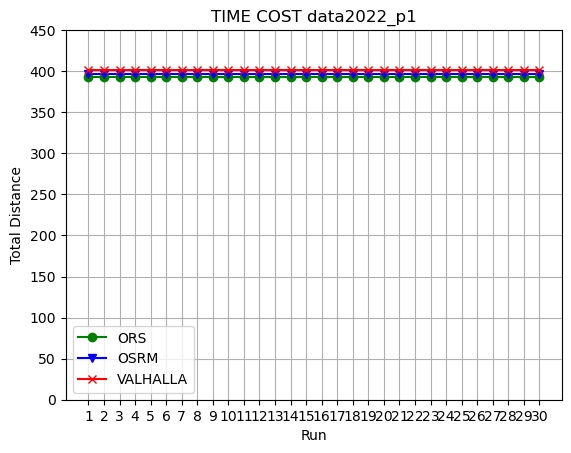

data2022_p2


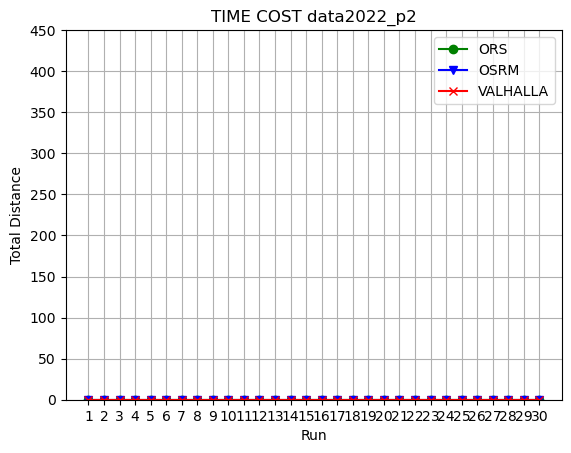

data2023_p1


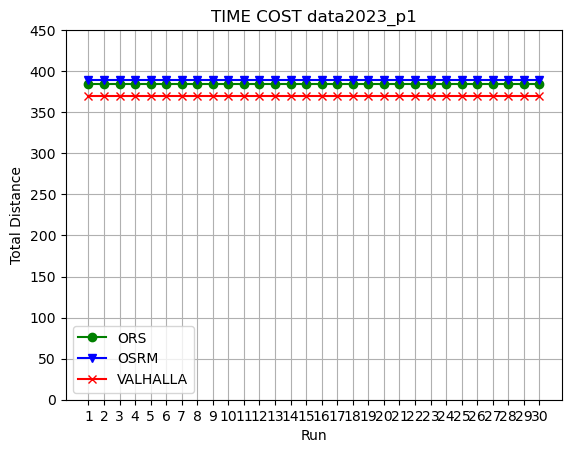

data2023_p2


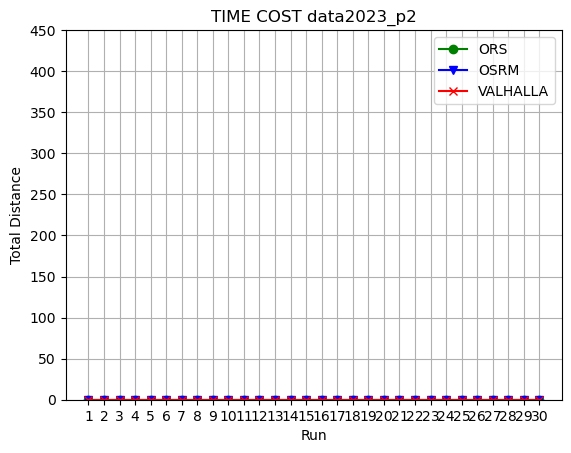

In [3]:
#Read your data from file
file = "Data/Resultat/MIX.txt"
df = pd.read_csv(file, sep=",", header=0)
# Plot line serie of data
names=['ORS','OSRM','VALHALLA']
ORS_start = 0
ORS_end = 30
OSRM_start = 30
OSRM_end = 60
VALHALLA_start = 60
VALHALLA_end = 90
for item in range(1,23):    
    for name in names: 
        x = range(1,31) 
        if(name=='ORS'):
            y = df['TOTAL_COST'].iloc[ORS_start:ORS_end].tolist() 
            plt.plot(x, y,color = 'green', label='ORS', marker='o')
        elif(name=='OSRM'):
            y = df['TOTAL_COST'].iloc[OSRM_start:OSRM_end].tolist() 
            plt.plot(x, y,color = 'blue', label='OSRM', marker='v')
        elif(name=='VALHALLA'): 
            y = df['TOTAL_COST'].iloc[VALHALLA_start:VALHALLA_end].tolist() 
            plt.plot(x, y,color = 'red', label='VALHALLA', marker='x')
        else:
            plt.plot(x, y)
    
    period = df['FILENAME'].iloc[ORS_start]
    splitting = period.split("/")
    period = splitting[-1]
    
    ORS_start += 90
    ORS_end += 90
    OSRM_start += 90
    OSRM_end += 90
    VALHALLA_start += 90
    VALHALLA_end += 90
    plt.ylim(bottom=0,top=450)
    print(period)
    plt.xlabel('Run')
    plt.ylabel('Total Distance')
    plt.title(f'TIME COST {period}')
    plt.grid(True)
    plt.xticks(x)
    plt.legend()
    plt.savefig(f'Data/Graphs/TimeCost/time_cost_{item}.svg')
    plt.show()
        #plt.savefig("Historgram1-ALL.svg")

Route is 0
Route is 0
Route is 0
Route is 0
Route is 0
Route is 0
Route is 0
Route is 0
Route is 0
Route is 0
Route is 0
Route is 0


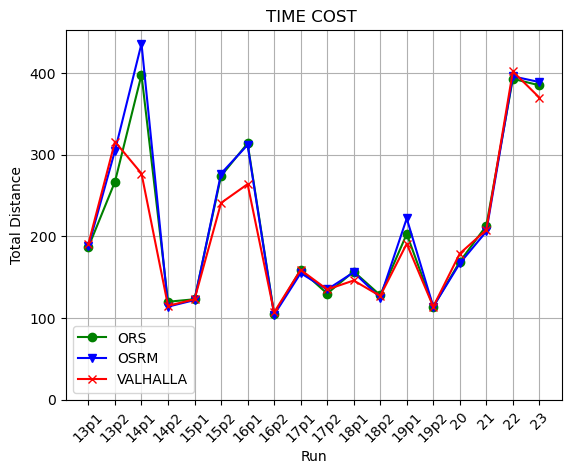

ÄÄÄÄÄÄ
{'ORS': [187, 267, 398, 120, 123, 274, 314, 105, 159, 130, 157, 128, 203, 114, 169, 213, 393, 385], 'OSRM': [188, 305, 436, 114, 122, 277, 312, 104, 155, 135, 156, 125, 222, 114, 167, 206, 396, 389], 'VALHALLA': [191, 316, 277, 115, 123, 241, 264, 107, 159, 135, 146, 127, 191, 114, 179, 208, 402, 370]}


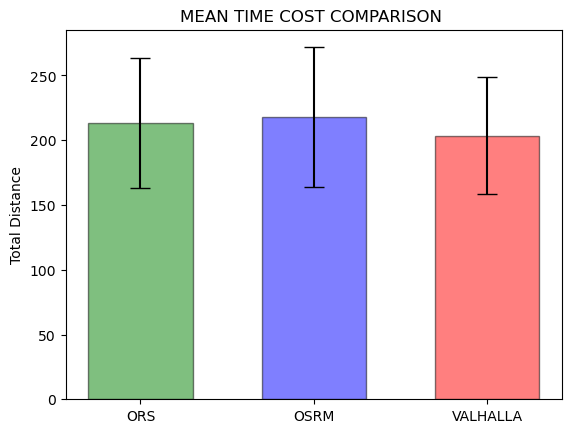

[0, 0, 121, 6, 1, 33, 50, 1, 4, 0, 11, 3, 12, 0, 2, 7, 0, 15]
[1, 38, 159, 0, 0, 36, 48, 0, 0, 5, 10, 0, 31, 0, 0, 0, 3, 19]
[4, 49, 0, 1, 1, 0, 0, 3, 4, 5, 0, 2, 0, 0, 12, 2, 9, 0]


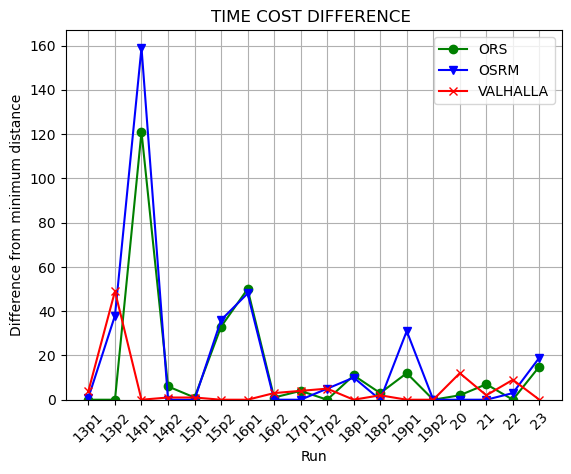

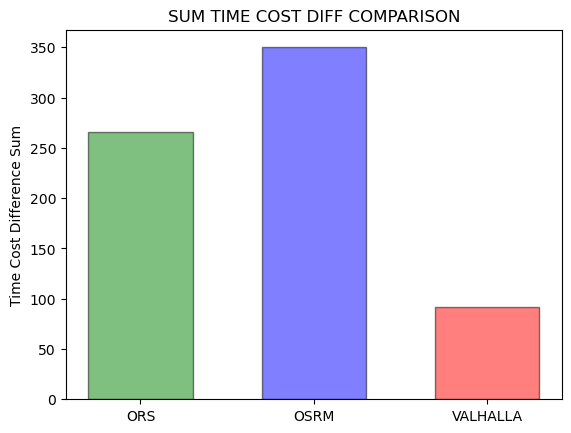

In [4]:
def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), stats.sem(a)
    h = se * stats.t.ppf((1 + confidence) / 2., n-1)
    return -h, +h

def make_graphs(filename,time_cost_method):
    #Read your data from file
    file = filename
    df = pd.read_csv(file, sep=",", header=0)
    # Plot line serie of data
    names=['ORS','OSRM','VALHALLA']
    ORS_start = 0
    ORS_end = 30
    OSRM_start = 30
    OSRM_end = 60
    VALHALLA_start = 60
    VALHALLA_end = 90
    ORS_y = []
    OSRM_y = []
    VALHALLA_y = []
    for a in range(1,23):    
        for name in names: 
            #x = range(1,19) 
#            if (df['TOTAL_COST'].iloc[ORS_start] != 0):
            if(name=='ORS'):
                for item in range(ORS_start,ORS_start+1):
                    if df['ALL_DELIVERED'].iloc[item]=='YES':
                        if df['TOTAL_COST'].iloc[item] != 0:
                            ORS_y.append(df['TOTAL_COST'].iloc[item])
                        else:
                            #print(df['ALL_DELIVERED'].iloc[item])
                            #print(df['TOTAL_COST'].iloc[item])
                            print("Route is 0")                
                    else:
                        print("UNDELIVERED SHIPMENTS")
                        ORS_y.append(-1)
            elif(name=='OSRM'):
                for item in range(OSRM_start,OSRM_start+1):
                    if df['ALL_DELIVERED'].iloc[item]=='YES':
                        if df['TOTAL_COST'].iloc[item] != 0:
                            OSRM_y.append(df['TOTAL_COST'].iloc[item])
                        else:
                            print("Route is 0")                
                    else:
                        print("UNDELIVERED SHIPMENTS")
                        OSRM_y.append(-1)
            elif(name=='VALHALLA'): 
                for item in range(VALHALLA_start,VALHALLA_start+1):
                    if df['ALL_DELIVERED'].iloc[item]=='YES':
                        if df['TOTAL_COST'].iloc[item] != 0:
                            VALHALLA_y.append(df['TOTAL_COST'].iloc[item]) 
                        else:
                            print("Route is 0")                
                    else:
                        print("UNDELIVERED SHIPMENTS")
                        VALHALLA_y.append(-1)
        ORS_start += 90
        ORS_end += 90
        OSRM_start += 90
        OSRM_end += 90
        VALHALLA_start += 90
        VALHALLA_end += 90
    x = ['13p1','13p2','14p1','14p2','15p1','15p2','16p1','16p2','17p1','17p2','18p1','18p2','19p1','19p2','20','21','22','23']
    #x = range(1,ORS_y.__len__()+1)
    plt.plot(x, ORS_y,color = 'green', label='ORS', marker='o')
    #x = range(1,OSRM_y.__len__()+1)
    plt.plot(x, OSRM_y,color = 'blue', label='OSRM', marker='v')
    #x = range(1,VALHALLA_y.__len__()+1)
    plt.plot(x, VALHALLA_y,color = 'red', label='VALHALLA', marker='x')
    plt.xlabel('Run')
    plt.ylabel('Total Distance')
    plt.title(f'TIME COST ')
    plt.grid(True)
    plt.xticks(x)
    plt.ylim(bottom=0)
    plt.xticks(rotation=45)
    plt.legend()
    plt.savefig(f"Data/Graphs/time-cost-{time_cost_method}.svg")
    plt.show()
    #Call CI function
    CI_ors = mean_confidence_interval(ORS_y)
    CI_osrm =  mean_confidence_interval(OSRM_y)
    CI_valhalla =  mean_confidence_interval(VALHALLA_y)
    #print ("CIs ORS: ", CI_ors)
    #print ("CIs OSRM", CI_osrm)
    #print ("CIs VALHALLA:", CI_valhalla) 
    #print(ORS_y)
    #print(OSRM_y)
    #print(VALHALLA_y)
    dict = {
        'ORS':ORS_y,
        'OSRM':OSRM_y,
        'VALHALLA':VALHALLA_y
    }

    print("ÄÄÄÄÄÄ")
    print(dict)
    df2 = pd.DataFrame(dict)
    df2.to_csv(f'Data/Graphs/data.txt', sep=',',header=0, index=False, encoding='utf-8')
    #print(df2['ORS'])
    # width of the bars
    barWidth = 0.6
    # Bars Data
    barsData = df2.mean()
    # The x-position order of bars
    barsOrder = range(len(df2.columns))
    # Std Bars Interval
    #barsInterval = df2.std()
    # Bars for CI Intervals
    df_CI = pd.DataFrame(list(zip(CI_ors, CI_osrm,CI_valhalla)), columns = ['ORS', 'OSRM', 'VALHALLA'])
    barsInterval = df_CI.iloc[1]
    #print(barsInterval)
    # Colours of bar charts
    colors=["green","blue","red" ]

    # Opacity of colours
    Opacity=0.5

    # Plot bars
    plt.bar(barsOrder, barsData, color = colors , edgecolor = 'black', width = barWidth, yerr=barsInterval, capsize=7, alpha=Opacity)

    #Put a tick on the x-axis undex each bar and label it with column name
    plt.xticks(range(len(df2.columns)), df2.columns)

    plt.ylabel('Total Distance')
    plt.ylim(bottom=0)
    plt.title(f'MEAN TIME COST COMPARISON ')
    plt.savefig(f"Data/Graphs/mean-time-cost-{time_cost_method}.svg")
    plt.show()
    ors_diff = []
    osrm_diff = []
    valhalla_diff = []
    for i in range (0,ORS_y.__len__()):
        a = ORS_y[i]
        b = OSRM_y[i]
        c = VALHALLA_y[i]
        # Filter out -1 values
        values = [value for value in [a, b, c] if value != -1]
        if values:            
            min_value = min(values)
    
            diff_a = a - min_value if a != -1 else 0
            diff_b = b - min_value if b != -1 else 0
            diff_c = c - min_value if c != -1 else 0

            ors_diff.append(diff_a)
            osrm_diff.append(diff_b)
            valhalla_diff.append(diff_c)
        else:
            ors_diff.append(0)
            osrm_diff.append(0)
            valhalla_diff.append(0)
    #print(ors_diff)
    #print(osrm_diff)
    #print(valhalla_diff)
    #x = range(1,ors_diff.__len__()+1) 
    print(ors_diff)
    print(osrm_diff)
    print(valhalla_diff)
    plt.plot(x, ors_diff,color = 'green', label='ORS', marker='o')
    plt.plot(x, osrm_diff,color = 'blue', label='OSRM', marker='v')
    plt.plot(x, valhalla_diff,color = 'red', label='VALHALLA', marker='x')
    plt.xlabel('Run')
    plt.ylabel('Difference from minimum distance')
    plt.title(f'TIME COST DIFFERENCE ')
    plt.grid(True)
    plt.xticks(x)
    plt.ylim(bottom=0)
    plt.legend()
    plt.xticks(rotation=45)
    plt.savefig(f"Data/Graphs/time-cost-diff-{time_cost_method}.svg")
    plt.show()
    ors_sum_diff = sum(ors_diff)
    osrm_sum_diff = sum(osrm_diff)
    valhalla_sum_diff = sum(valhalla_diff)
    x = ['ORS','OSRM','VALHALLA']
    y = [ors_sum_diff,osrm_sum_diff,valhalla_sum_diff]

    plt.bar(x,y,color = colors, edgecolor = 'black', width = barWidth,alpha=Opacity)
    #Put a tick on the x-axis undex each bar and label it with column name
    plt.xticks(range(len(df2.columns)), df2.columns)

    plt.ylabel('Time Cost Difference Sum')
    plt.ylim(bottom=0)
    #plt.xlabel('Browsers')
    plt.title('SUM TIME COST DIFF COMPARISON')
    plt.savefig(f"Data/Graphs/Sum-time-cost-diff-{time_cost_method}.svg")
    plt.show()
#make_graphs("Data/Resultat/MAX.txt","max")
make_graphs("Data/Resultat/MIX.txt","mix")
#make_graphs("Data/Resultat/MIN.txt","min")

In [5]:
print("Hello")

Hello


In [6]:
import scipy.stats as stats
import numpy as np
import statsmodels.stats.multicomp as multi
import pandas as pd

def anova(*data): # * indicates, 0, 1 , 2 .. arguments
    if len(data) == 2:
        statistic, pvalue = stats.f_oneway(data[0], data[1])
    elif len(data) == 3:
        statistic, pvalue = stats.f_oneway(data[0], data[1], data[2])
    elif len(data) == 4:
        statistic, pvalue = stats.f_oneway(data[0], data[1], data[2], data[3])
    print("ANOVA Statistic " + str(statistic) + " and p-value " + str(pvalue))
    if pvalue < statistic:
        return True
    else:
        return False
def exampleAnova():
    #Determine the group labels
    columns = ['ORS','OSRM','Valhalla']
    #Read your data from file
    file = "Data/Graphs/data.txt"
    df = pd.read_csv(file, sep=",", header=None, names=['ORS','OSRM','Valhalla'])
    #Run Anova on data groups
    if (anova (df['ORS'], df['OSRM'], df['Valhalla'])):
        print ("The means are different")
    else:
        print ("No differences in means")

exampleAnova()

ANOVA Statistic 0.09582855474254855 and p-value 0.9087829941912111
No differences in means


    id treatment  result
0    0       ORS     187
1    0      OSRM     188
2    0  Valhalla     191
3    1       ORS     267
4    1      OSRM     305
5    1  Valhalla     316
6    2       ORS     398
7    2      OSRM     436
8    2  Valhalla     277
9    3       ORS     120
10   3      OSRM     114
11   3  Valhalla     115
12   4       ORS     123
13   4      OSRM     122
14   4  Valhalla     123
15   5       ORS     274
16   5      OSRM     277
17   5  Valhalla     241
18   6       ORS     314
19   6      OSRM     312
20   6  Valhalla     264
21   7       ORS     105
22   7      OSRM     104
23   7  Valhalla     107
24   8       ORS     159
25   8      OSRM     155
26   8  Valhalla     159
27   9       ORS     130
28   9      OSRM     135
29   9  Valhalla     135
30  10       ORS     157
31  10      OSRM     156
32  10  Valhalla     146
33  11       ORS     128
34  11      OSRM     125
35  11  Valhalla     127
36  12       ORS     203
37  12      OSRM     222
38  12  Valhalla     191


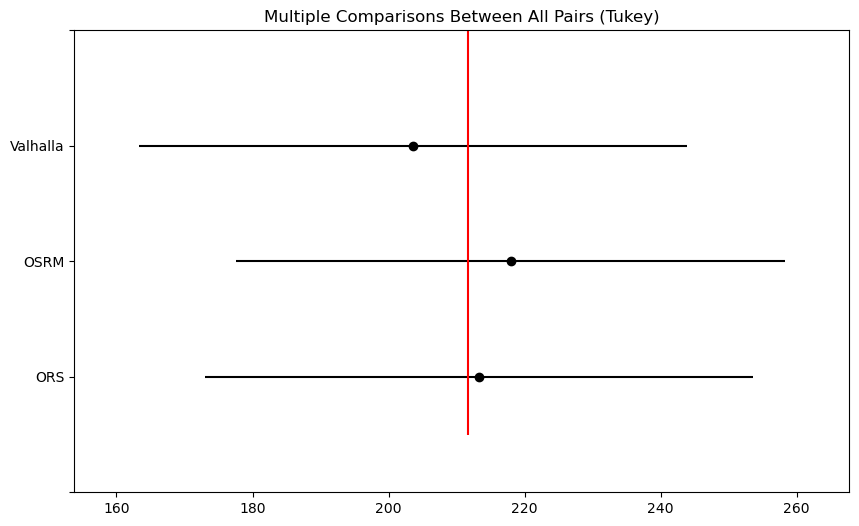

In [7]:
import statsmodels.stats.multicomp as multi
import pandas as pd
import matplotlib.pyplot as plt
def tuckeyTest(*data, groups):
    # Put data into dataframe
    df = pd.DataFrame()
    if len(data) == 2:
        print ("Tuckey test requires more than two data sources")
    elif len(data) == 3:
        df[ groups[0] ] = data[0]
        df[ groups[1] ] = data[1]
        df[ groups[2] ] = data[2]
    elif len(data) == 4:
        df[ groups[0] ] = data[0]
        df[ groups[1] ] = data[1]
        df[ groups[2] ] = data[2]
        df[ groups[3] ] = data[3]
    #Python Way
    # Stack the data (and rename columns):
    stacked_data = df.stack().reset_index()
    stacked_data = stacked_data.rename(columns={'level_0': 'id','level_1': 'treatment',0:'result'})
    # Show the stacked data:
    print (stacked_data)
    # Show all pair-wise comparisons:
    res2 = multi.pairwise_tukeyhsd (stacked_data['result'],
    stacked_data['treatment'])
    print(res2)
    # plot Simultaneous Confidence Intervals
    res2.plot_simultaneous()
    # if you want to scompute and show the Grand Mean line
    grandMean = stacked_data['result'].values.mean()
    plt.vlines(x=grandMean,ymin=-0.5,ymax=4.5, color="red")
    plt.show()
# Prpare data for Tuckey test
#Read your data from file
file = "Data/Graphs/data.txt"
df = pd.read_csv(file, sep=",", header=None, names=['ORS','OSRM','Valhalla'])
tuckeyTest(df['ORS'], df['OSRM'], df['Valhalla'], groups = ['ORS','OSRM','Valhalla'])